In [21]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

year_month_format = mdates.DateFormatter('%m/%y')

In [16]:
ticker_list = ['SPY', 'QQQ', 'UUP', 'EEM', 'TLT']
prices = pd.DataFrame(columns=ticker_list)

In [17]:
for ticker in ticker_list:
    prices[ticker] = yf.download(ticker, '2015-01-01', '2019-01-01')['Adj Close']

prices.sort_values(by=['Date'], inplace=True, ascending=True)
prices.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,SPY,QQQ,UUP,EEM,TLT
Date,,,,,
2015-01-02,186.159332,98.228889,23.450499,34.665909,112.462868
2015-01-05,182.797379,96.788002,23.498949,34.048954,114.229492
2015-01-06,181.075607,95.490242,23.547400,33.905880,116.287605
2015-01-07,183.332016,96.721207,23.634613,34.639084,116.057938
2015-01-08,186.585236,98.572403,23.731516,35.229214,114.520927


In [18]:
simple_moving_averages = prices.rolling(window=50).mean()
simple_moving_averages.sort_values(by='Date', inplace=True, ascending=True)
simple_moving_averages

,SPY,QQQ,UUP,EEM,TLT
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-12-24,261.901587,164.252033,24.995886,38.308540,112.436378
2018-12-26,261.348697,163.828272,25.008033,38.293504,112.560678
2018-12-27,260.863153,163.457950,25.019187,38.285729,112.686339


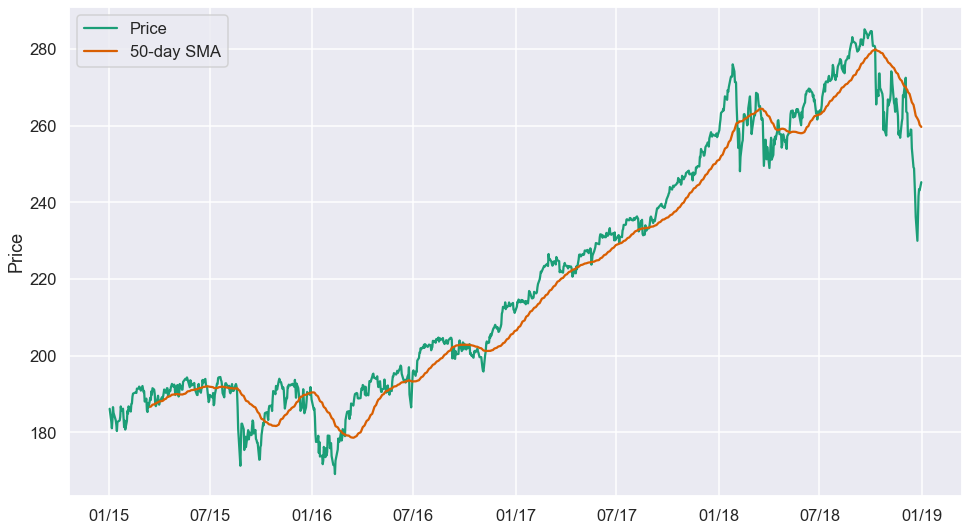

In [22]:
start_date = '2015-01-01'
end_date = '2018-12-31'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(prices.loc[start_date:end_date, :].index, prices.loc[start_date:end_date, ticker_list[0]], label='Price')
ax.plot(simple_moving_averages.loc[start_date:end_date, :].index, simple_moving_averages.loc[start_date:end_date, ticker_list[0]], label = '50-day SMA')

ax.legend(loc='best')
ax.set_ylabel('Price')
ax.xaxis.set_major_formatter(year_month_format)